<a href="https://colab.research.google.com/github/fatima448/Heart-Disease-Prediction/blob/main/heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os

if os.path.exists("/content/drive/MyDrive/Heart_Disease/heart_model.joblib"):
    model_path = "/content/drive/MyDrive/Heart_Disease/heart_model.joblib"
else:
    model_path = "heart_model.joblib"  # local folder

model = joblib.load(model_path)


In [26]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Heart_Disease/heart_Disease_prediction_new_final.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0.0,0.0,1,0
1,49,0,3,160,180,0,0,156,0.0,1.0,2,1
2,37,1,2,130,283,0,1,98,0.0,0.0,1,0
3,48,0,4,138,214,0,0,108,1.0,1.5,2,1
4,54,1,3,150,195,0,0,122,0.0,0.0,1,0


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3235 non-null   int64  
 1   sex       3235 non-null   int64  
 2   cp        3235 non-null   int64  
 3   trestbps  3235 non-null   int64  
 4   chol      3235 non-null   int64  
 5   fbs       3235 non-null   int64  
 6   restecg   3235 non-null   int64  
 7   thalach   3235 non-null   int64  
 8   exang     3187 non-null   float64
 9   oldpeak   3235 non-null   float64
 10  slope     3235 non-null   int64  
 11  target    3235 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 303.4 KB


In [28]:
df.shape

(3235, 12)

In [29]:
df['target'].value_counts()


,count
target,
1,1709
0,1526


In [30]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,48
oldpeak,0


In [31]:

df['exang'].fillna(df['exang'].mode()[0], inplace=True)


/tmp/ipython-input-524615609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].fillna(df['exang'].mode()[0], inplace=True)


In [32]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [33]:
X = df.drop("target", axis=1)
y = df["target"]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
accuracy_score(y_test, y_pred_lr)



0.7527047913446677

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)


0.9706336939721792

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       305
           1       0.98      0.97      0.97       342

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



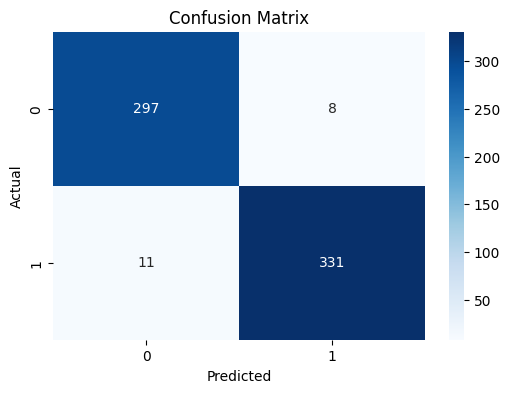

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [40]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
cp,0.155641
chol,0.134772
thalach,0.130600
slope,0.126255
age,0.106737
trestbps,0.100872
oldpeak,0.096119
restecg,0.069241
exang,0.032509
sex,0.031542


In [41]:
import pandas as pd

# Create Feature Selection (BDF) Matrix
feature_selection_matrix = pd.DataFrame({
    "Feature": [
        "age", "sex", "cp", "trestbps", "chol",
        "fbs", "restecg", "thalach",
        "exang", "oldpeak", "slope"
    ],
    "Medical Meaning": [
        "Age of the patient",
        "Biological sex (0 = Female, 1 = Male)",
        "Chest pain type",
        "Resting blood pressure",
        "Serum cholesterol level",
        "Fasting blood sugar > 120 mg/dl",
        "Resting ECG result",
        "Maximum heart rate achieved",
        "Exercise-induced angina",
        "ST depression induced by exercise",
        "Slope of the ST segment"
    ],
    "Selected (Yes/No)": [
        "Yes", "Yes", "Yes", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"
    ],
    "Selection Method": [
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance",
        "Random Forest Feature Importance"
    ],
    "Reason for Selection": [
        "Strong correlation with heart disease risk",
        "Important demographic risk factor",
        "Key indicator of cardiac issues",
        "Reflects cardiovascular condition",
        "Associated with heart disease",
        "Indicates diabetic condition",
        "Shows electrical heart activity",
        "Indicates heart performance",
        "Shows exercise-related symptoms",
        "Indicates ischemia severity",
        "Reflects ECG abnormalities"
    ]
})

feature_selection_matrix


,Feature,Medical Meaning,Selected (Yes/No),Selection Method,Reason for Selection
0,age,Age of the patient,Yes,Random Forest Feature Importance,Strong correlation with heart disease risk
1,sex,"Biological sex (0 = Female, 1 = Male)",Yes,Random Forest Feature Importance,Important demographic risk factor
2,cp,Chest pain type,Yes,Random Forest Feature Importance,Key indicator of cardiac issues
3,trestbps,Resting blood pressure,Yes,Random Forest Feature Importance,Reflects cardiovascular condition
4,chol,Serum cholesterol level,Yes,Random Forest Feature Importance,Associated with heart disease
5,fbs,Fasting blood sugar > 120 mg/dl,Yes,Random Forest Feature Importance,Indicates diabetic condition
6,restecg,Resting ECG result,Yes,Random Forest Feature Importance,Shows electrical heart activity
7,thalach,Maximum heart rate achieved,Yes,Random Forest Feature Importance,Indicates heart performance
8,exang,Exercise-induced angina,Yes,Random Forest Feature Importance,Shows exercise-related symptoms
9,oldpeak,ST depression induced by exercise,Yes,Random Forest Feature Importance,Indicates ischemia severity


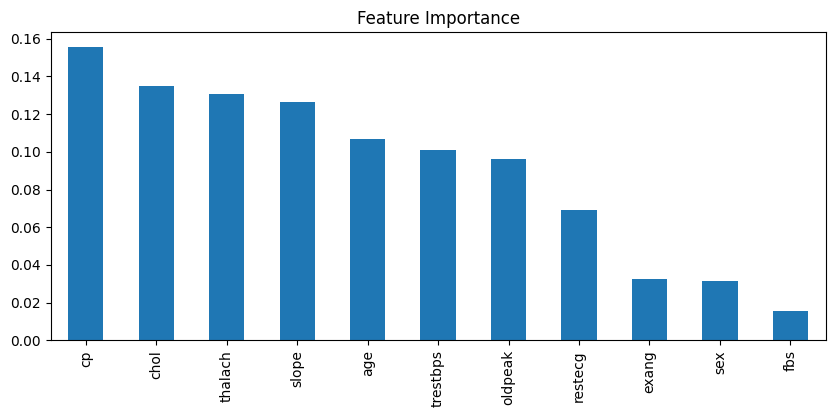

In [42]:
feature_importance.plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance")
plt.show()



In [43]:
import joblib

joblib.dump(rf, "/content/drive/MyDrive/Heart_Disease/heart_model.joblib")
joblib.dump(scaler, "/content/drive/MyDrive/Heart_Disease/scaler.joblib")



['/content/drive/MyDrive/Heart_Disease/scaler.joblib']

In [44]:
import gradio as gr
import numpy as np
import pandas as pd
import joblib

# =========================
# Load trained model
# =========================
model = joblib.load("/content/drive/MyDrive/Heart_Disease/heart_model.joblib")

# =========================
# Prediction function
# =========================
def predict_heart(
    age, sex, cp, trestbps, chol, fbs,
    restecg, thalach, exang, oldpeak, slope
):
    try:
        # Convert inputs to numpy array (same order as training)
        data = np.array([[
            age, sex, cp, trestbps, chol, fbs,
            restecg, thalach, exang, oldpeak, slope
        ]], dtype=float)

        prediction = model.predict(data)[0]

        if prediction == 1:
            return "🔴 Heart Disease Detected (Output = 1)"
        else:
            return "🟢 No Heart Disease Detected (Output = 0)"

    except Exception as e:
        return f"❌ Error: {str(e)}"

# =========================
# Gradio Interface
# =========================
interface = gr.Interface(
    fn=predict_heart,
    inputs=[
        gr.Number(label="Age (years)", value=45),
        gr.Dropdown([0, 1], label="Sex (0 = Female, 1 = Male)", value=0),
        gr.Dropdown([0, 1, 2, 3], label="Chest Pain Type (cp)", value=1),
        gr.Number(label="Resting Blood Pressure (trestbps)", value=120),
        gr.Number(label="Cholesterol (mg/dl)", value=190),
        gr.Dropdown([0, 1], label="Fasting Blood Sugar > 120 (fbs)", value=0),
        gr.Dropdown([0, 1, 2], label="Rest ECG Result (restecg)", value=0),
        gr.Number(label="Max Heart Rate Achieved (thalach)", value=170),
        gr.Dropdown([0, 1], label="Exercise Induced Angina (exang)", value=0),
        gr.Number(label="ST Depression (oldpeak)", value=0.0),
        gr.Dropdown([0, 1, 2], label="Slope of ST Segment (slope)", value=1),
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="❤️ Heart Disease Prediction System",
    description=(
        "Binary Classification System\n"
        "Output: 1 = Heart Disease, 0 = No Heart Disease\n\n"
        "Enter patient clinical values and click Predict."
    ),
    allow_flagging="never"
)

interface.launch()


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c929849444a191908.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
